In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn = pd.read_csv("/content/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [3]:
# Describing numerical variables in our data
churn.describe()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
count,46206.000000,46206.000000,46206.000000,46130.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,28416.000000,28416.000000,28416.000000
mean,42335.196879,45.874627,1.555707,41.411836,50.318617,51.364858,10.846708,8.237112,20.349825,15.249968,0.385015,75.188029,0.014640,0.191125,0.007038
std,22100.432751,33.077927,0.835529,15.263726,51.925537,20.855419,9.769887,8.341476,8.034631,10.982958,0.486604,73.519041,0.120108,0.393194,0.083600
min,1.000000,0.000000,1.000000,-4.000000,0.000000,8.180000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,0.000000,0.000000,0.000000
25%,24951.750000,14.000000,1.000000,28.000000,11.000000,36.360000,3.000000,0.000000,24.000000,0.000000,0.000000,36.360000,0.000000,0.000000,0.000000
50%,43261.000000,44.000000,1.000000,40.000000,35.000000,54.540000,8.000000,7.000000,24.000000,24.000000,0.000000,54.540000,0.000000,0.000000,0.000000
75%,61132.750000,77.000000,2.000000,52.000000,69.000000,72.720000,16.000000,16.000000,24.000000,24.000000,1.000000,84.530000,0.000000,0.000000,0.000000
max,79500.000000,120.000000,4.000000,116.000000,259.000000,234.540000,147.000000,24.000000,36.000000,36.000000,1.000000,1965.890000,1.000000,1.000000,1.000000


From the description above, we can observe some points


*   The minimum age in the AGE column is -4, this isn't correct because age can't be negative
*   The AGE,contains missing values.



In [4]:
# Describing categorical variables in our data
churn.describe(include=['O'])

,CFU,BYO_PLAN_STATUS,CONTRACT_STATUS,HANDSET_USED_BRAND,COUNTRY_METRO_REGION,STATE
count,46206,46206,46206,46206,46205,46205
unique,2,2,3,6,2,8
top,CONSUMER,NON BYO,ON-CONTRACT,APPLE,METRO,NSW
freq,39087,35475,28281,24805,31826,15867


From the description above, we can observe that COUNTRY_METRO_REGION and	STATE contains 1 missing value each



In [5]:
# Filling null values of categorical variables with mode
churn['COUNTRY_METRO_REGION'] = churn['COUNTRY_METRO_REGION'].fillna(churn['COUNTRY_METRO_REGION'].mode()[0])
churn['STATE'] = churn['STATE'].fillna(churn['STATE'].mode()[0])

In [6]:
# removing the three RECON fields
churn.drop(['RECON_SMS_NEXT_MTH', 'RECON_TELE_NEXT_MTH', 'RECON_EMAIL_NEXT_MTH'], axis=1)

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,79494,10,1,61.0,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC
46203,79495,2,1,53.0,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW
46204,79496,47,1,22.0,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW


In [7]:
# Checking ages less than zero
churn.loc[churn['AGE']< 0]

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
39239,68281,51,1,-4.0,CONSUMER,51,8.18,NON BYO,3,0,0,NO-CONTRACT,0,GOOGLE,0,17.71,METRO,SA,0.0,0.0,0.0
42245,73078,58,1,-4.0,SMALL BUSINESS,58,54.54,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,55.12,METRO,VIC,NaN,NaN,NaN


In [8]:
# Replacing the negative ages with positive
churn.loc[churn['AGE']< 0, 'AGE'] = 4

In [9]:
# Selecting dependent and independent variables
X = churn.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17]].values
Y = churn.iloc[:, 14].values 


In [10]:
#Working with missing data for AGE    										
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #this replaces the missing value with the mean across each colum
imputer = imputer.fit(X[:, [2]])
X[:, [2]]= imputer.transform(X[:, [2]])
print (X[:, [2]])

[[30.0]
 [55.0]
 [29.0]
 ...
 [22.0]
 [40.0]
 [24.0]]


In [11]:
#Encoding Categorical Data
#Encoding independent variable
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(categories='auto'),[3,6,10,12,14,15])],
                                     remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)
print (X)

[[ 1.    0.    0.   ... 24.   24.   61.4 ]
 [ 1.    0.    0.   ... 24.   24.   54.54]
 [ 1.    0.    1.   ... 12.   12.    2.5 ]
 ...
 [ 1.    0.    0.   ... 24.   24.   72.72]
 [ 1.    0.    0.   ... 24.   24.   17.27]
 [ 1.    0.    1.   ...  0.    0.   36.36]]


In [12]:
X = pd.DataFrame({'ACCOUNT_TENURE':X[:,1], 'ACCT_CNT_SERVICES':X[:,2], 'AGE':X[:,3], 'CFU':X[:,4],
                  'SERVICE_TENURE':X[:,5], 'PLAN_ACCESS_FEE':X[:,6], 'BYO_PLAN_STATUS':X[:,7], 'PLAN_TENURE':X[:,8],
                  'MONTHS_OF_CONTRACT_REMAINING':X[:,9], 'LAST_FX_CONTRACT_DURATION	':X[:,10], 'CONTRACT_STATUS':X[:,11], 
                  'PREV_CONTRACT_DURATION':X[:,12], 'HANDSET_USED_BRAND':X[:,13], 'MONTHLY_SPEND':X[:,15],
                  'COUNTRY_METRO_REGION':X[:,16], 'STATE':X[:,17]})

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                     Specs        Score
4           SERVICE_TENURE  1490.109472
5          PLAN_ACCESS_FEE   989.116988
11  PREV_CONTRACT_DURATION   402.981891
1        ACCT_CNT_SERVICES   194.727934
3                      CFU   175.756055


[0.03640095 0.07418321 0.06826523 0.01973805 0.22853135 0.30801159
 0.02607046 0.02176162 0.00565341 0.01708088 0.01577896 0.07660856
 0.07231656 0.01046617 0.01711005 0.00202295]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


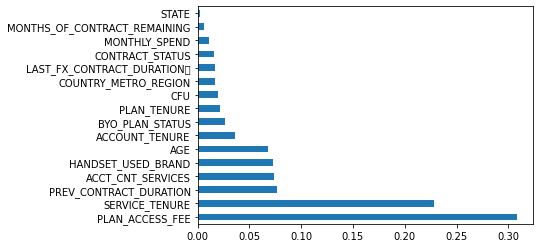

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

The chart above shows the features in the data and how their contributions to providing accurate results

In [15]:
#Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [16]:
cols_to_scale = ['ACCOUNT_TENURE','ACCT_CNT_SERVICES','AGE','SERVICE_TENURE','PLAN_ACCESS_FEE',	
                 'PLAN_TENURE','MONTHS_OF_CONTRACT_REMAINING','LAST_FX_CONTRACT_DURATION\t','PREV_CONTRACT_DURATION',
                	'MONTHLY_SPEND']
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train[cols_to_scale])
X_test = sc_X.transform(X_test[cols_to_scale])

In [17]:
# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

0.6624585196941278


In [19]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
print (Y_pred)

var_prob = classifier.predict_proba(X_test)
print(var_prob)

[0 1 0 ... 0 1 0]
[[0.70372278 0.29627722]
 [0.30710251 0.69289749]
 [0.56379184 0.43620816]
 ...
 [0.70372278 0.29627722]
 [0.3729221  0.6270779 ]
 [0.70372278 0.29627722]]


In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print (cm)

[[7307 1190]
 [3489 1876]]
